<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assignment07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

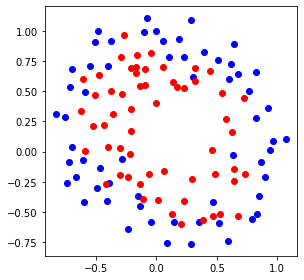

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data07-nonlinear.txt", delimiter=',')

x  = data[:, 0]
y  = data[:, 1]
label   = data[:, 2]

pointX0 = x[label == 0]
pointY0 = y[label == 0]

pointX1 = x[label == 1]
pointY1 = y[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
#define function for estimate training accuracy
def accuracy(sigmoid) : 
  label_z = []
  for i in sigmoid:
    if i > 0.5:
      i = 1
    else : i = 0
    label_z.append(i)

  correct = 0
  for i, j in zip(label_z, label):
    if i ==j:
      correct +=1
  return correct/len(label)

In [151]:
#make theta list
np.random.seed(50)
theta_list = np.random.randn(100)
theta_list = theta_list.reshape(1, 100)
print(theta_list.shape)

#make x, y list
xy_list = []
for i in range(10):
  for j in range(10):
    xy_list.append((x**i) * (y**j))
xy_list = np.array(xy_list)
print(xy_list.shape)

(1, 100)
(100, 118)


In [0]:
#set alpha, iteration and regularization parameters
alpha = 0.01
lambda_1 = 0.00001 
lambda_2 = 0.005
lambda_3 = 0.3
# iteration = 50000
iteration = 150000

def training(alpha, lambda_, theta_list): 

  cost_list = []
  accuracy_list = []

  for i in range(iteration):
    #hypothesis
    z = (theta_list.dot(xy_list)).sum(axis = 0)
    sigmoid_z = 1/(1 + np.exp(-z))
    error = sigmoid_z - label
    accuracy_list.append(accuracy(sigmoid_z))

    #objective function
    cost = (-label * np.log(sigmoid_z) - (1 - label) * np.log(1 - sigmoid_z)).mean() + (lambda_/2 * theta_list**2).sum()
    cost_list.append(cost) 

    #gradient descent
    theta_grad = []
    for index in range(len(error)):
      grad = xy_list[:, index]* error[index]
      theta_grad.append(grad)

    theta_grad = np.array(theta_grad).sum(axis=0) + lambda_ * theta_list
    theta_list = theta_list - alpha *  theta_grad

  return accuracy_list, cost_list, theta_list

#training three other regularization parameter
lambda1_accuracy_list, lambda1_cost_list, lambda1_theta_list = training(alpha, lambda_1, theta_list)
lambda2_accuracy_list, lambda2_cost_list, lambda2_theta_list = training(alpha, lambda_2, theta_list)
lambda3_accuracy_list, lambda3_cost_list, lambda3_theta_list = training(alpha, lambda_3, theta_list)

0.30524264223465264
1.9418073034818253
7.492258284674943


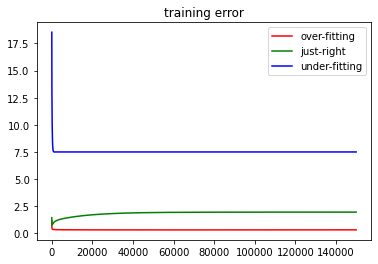

In [153]:
#plot the value of the objective function at every optimization step
plt.plot(range(0, iteration), lambda1_cost_list, 'red', label = 'over-fitting')
plt.plot(range(0, iteration), lambda2_cost_list, 'green', label = 'just-right')
plt.plot(range(0, iteration), lambda3_cost_list, 'blue', label = 'under-fitting')
plt.title('training error')
plt.legend(loc = 'best')
print(lambda1_cost_list[-1])
print(lambda2_cost_list[-1])
print(lambda3_cost_list[-1])

plt.show()